# Missing Data

Missing values are a common problem within datasets. Data can be missing for a number of reasons, including tool/sensor failure, data vintage, telemetry issues, stick and pull, and omissing by choice. 

There are a number of tools we can use to identify missing data, some of these methods include:

- Pandas Dataframe summaries
- MissingNo Library
- Visualisations

How to handle missing data is controversial, some argue that data should be filled in using techniques such as: mean imputation, regression imputations, whereas others argue that it is best to remove that data to prevent adding further uncertainty to the final results.

In this notebook, we are going to use: Variable Discarding and Listwise Deletion.

# Importing Libraries & Data
The first step is to import the libraries that we will require for working with the data. 
For this notebook, we will be using:
- pandas for loading and storing the data
- matplotlib and seaborn for visualising the data
- numpy for a number of calculation methods
- missingno to visualise where missing data exists

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

Next, we will load the data in using the pandas `read_csv` function and assign it to the variable `df`. The data will now be stored within a structured object known as a dataframe.

In [2]:
df = pd.read_csv('data/spwla_volve_data.csv')

As seen in the previous notebook, we can call upon a few methods to check the data quality. 

The `.head()` method allows us to view the first 5 rows of the dataframe.

In [3]:
df.head()

,wellName,MD,BS,CALI,DT,DTS,GR,NPHI,RACEHM,RACELM,RHOB,RPCEHM,RPCELM,PHIF,SW,VSH
0,15/9-F-1 A,3431.0,8.5,8.6718,86.9092,181.2241,53.9384,0.3222,0.5084,0.8457,2.7514,0.6461,0.6467,0.02,1.0,0.6807
1,15/9-F-1 A,3431.1,8.5,8.6250,86.4334,181.1311,57.2889,0.3239,0.4695,0.8145,2.7978,0.7543,0.6570,0.02,1.0,0.7316
2,15/9-F-1 A,3431.2,8.5,8.6250,85.9183,180.9487,59.0455,0.3277,0.5012,0.8048,2.8352,0.8718,0.6858,0.02,1.0,0.7583
3,15/9-F-1 A,3431.3,8.5,8.6250,85.3834,180.7211,58.2550,0.3357,0.6048,0.7984,2.8557,0.9451,0.7913,0.02,1.0,0.7462
4,15/9-F-1 A,3431.4,8.5,8.6250,84.8484,180.4930,59.4569,0.3456,0.7115,0.7782,2.8632,1.0384,0.8730,0.02,1.0,0.7646


The describe method provides us some summary statistics. To identify if we have missing data using this method, we need to look at the count row. If we assume that MD (measured depth) is the most complete column, we have 27,845 data points. Now, if we look at DT and DTS, we can see we only have 5,493 and 5,420 data points respectively. A number of other columns also have lower numbers, namely: RPCELM, PHIF, SW, VSH.

In [4]:
df.describe()

,MD,BS,CALI,DT,DTS,GR,NPHI,RACEHM,RACELM,RHOB,RPCEHM,RPCELM,PHIF,SW,VSH
count,27845.000000,27845.0,27845.000000,5493.000000,5420.000000,27845.000000,27845.000000,27845.000000,27845.000000,27845.000000,27845.000000,27600.000000,27736.000000,27736.000000,2.784400e+04
mean,3816.224960,8.5,8.625875,78.000104,131.027912,38.529140,0.188131,352.689922,97.558930,2.379268,1561.079977,30.041154,0.157434,0.531684,2.724204e-01
std,398.843662,0.0,0.079941,7.730495,13.230939,21.814711,0.053390,1367.355219,395.725094,0.162293,9570.308431,210.915588,0.075957,0.353637,1.872371e-01
min,3223.000000,8.5,8.304900,54.280000,83.574000,6.869100,0.024000,0.197400,0.234900,1.627000,0.139000,0.136600,0.001000,0.043000,1.820000e-15
25%,3503.000000,8.5,8.556900,72.562500,123.403425,21.128200,0.157000,1.856400,1.781000,2.240000,2.148300,1.884000,0.091000,0.201000,1.258000e-01
50%,3713.300000,8.5,8.625000,77.228000,131.864350,35.071000,0.183900,4.035800,3.681200,2.356000,5.136800,4.195400,0.178000,0.433000,2.400000e-01
75%,4057.000000,8.5,8.672000,84.342900,138.017500,49.178300,0.215200,14.929000,8.891000,2.502500,24.687400,14.782650,0.225000,1.000000,3.540000e-01
max,4744.000000,8.5,9.175000,96.277600,186.090800,127.055700,0.541000,6381.099100,2189.603000,3.090000,62290.770000,5571.435100,0.292000,1.000000,1.000000e+00


To gain a clearer insight, we can call upon the `info()` method to see how many non-null values exist for each column. Right away we can see the ones highlighted previously have lower numbers of non-null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27845 entries, 0 to 27844
Data columns (total 16 columns):
wellName    27845 non-null object
MD          27845 non-null float64
BS          27845 non-null float64
CALI        27845 non-null float64
DT          5493 non-null float64
DTS         5420 non-null float64
GR          27845 non-null float64
NPHI        27845 non-null float64
RACEHM      27845 non-null float64
RACELM      27845 non-null float64
RHOB        27845 non-null float64
RPCEHM      27845 non-null float64
RPCELM      27600 non-null float64
PHIF        27736 non-null float64
SW          27736 non-null float64
VSH         27844 non-null float64
dtypes: float64(15), object(1)
memory usage: 3.4+ MB


## Using missingno to Visualise Data Sparsity

The missingno library is designed to take a dataframe and allow you to visualise where gaps may exist. 

We can simply call upon the `.matrix()` method and pass in the dataframe object. When we do, we generate a graphical view of the dataframe.

In the plot below, we can see that there are significant gaps within the DT and DTS columns, with minor gaps in the RPCELM, PHIF, and SW columns. 

The sparkline to the right hand side of the plot provides an indication of data completeness. If the line is at the maximum value (to the right) it shows that data row as being complete. 

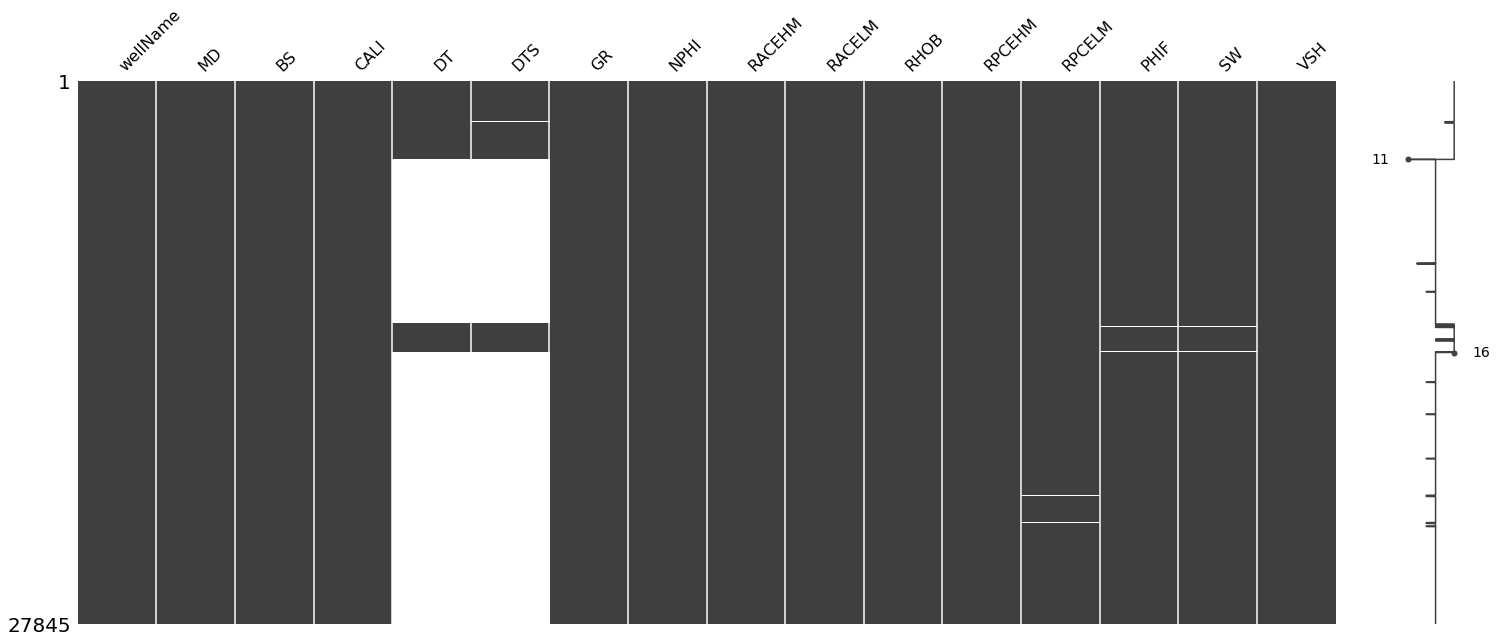

In [6]:
msno.matrix(df)
plt.show()

Another plot we can call upon is the bar plot, which provides a graphical summary of the number of points in each columns.

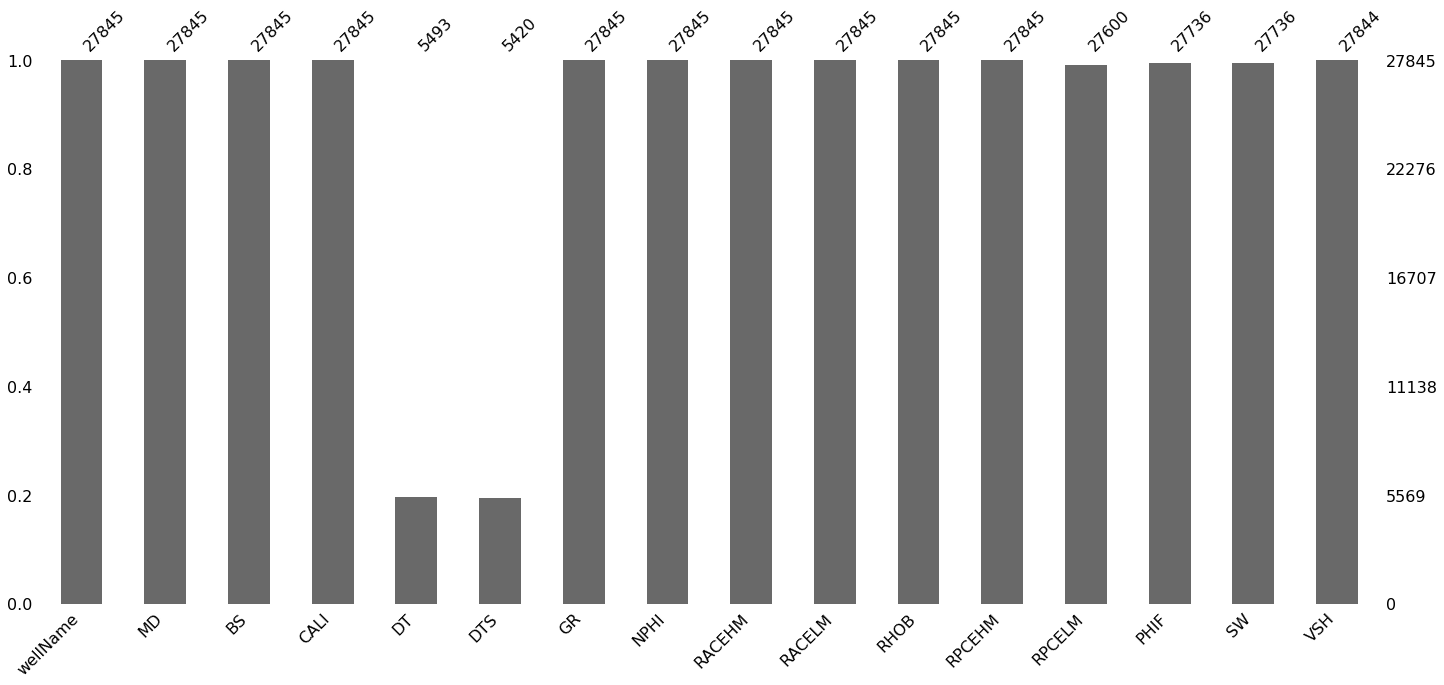

In [7]:
msno.bar(df)

## Using matplotlib

We can generate our own plots to show how the data sparsity varies across each of the wells. In order to do this, we need to manipulate the dataframe.

First we create a copy of the dataframe to work on separately, and then replace each column with a value of 1 if the data is non-null.

To make our plot work, we need to increment each column's value by 1. This allows us to plot each column as an offset to the previous one.

In [8]:
data_nan = df.copy()
for num, col in enumerate(data_nan.columns[2:]):
    data_nan[col] = data_nan[col].notnull() * (num + 1)
    data_nan[col].replace(0, num, inplace=True)

When we view the header of the dataframe we now have a series of columns with increasing values from 1 to 14.

In [9]:
data_nan.head()

,wellName,MD,BS,CALI,DT,DTS,GR,NPHI,RACEHM,RACELM,RHOB,RPCEHM,RPCELM,PHIF,SW,VSH
0,15/9-F-1 A,3431.0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,15/9-F-1 A,3431.1,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2,15/9-F-1 A,3431.2,1,2,3,4,5,6,7,8,9,10,11,12,13,14
3,15/9-F-1 A,3431.3,1,2,3,4,5,6,7,8,9,10,11,12,13,14
4,15/9-F-1 A,3431.4,1,2,3,4,5,6,7,8,9,10,11,12,13,14


Next, we can group the dataframe by the wellName column.

In [10]:
grouped = data_nan.groupby('wellName')

We can then create multiple subplots for each well using the new dataframe. Rather than creating subplots within subplots, we can shade from the previous column's max value to the current column's max value if the data is present. If data is absent, it will be displayed as a gap.

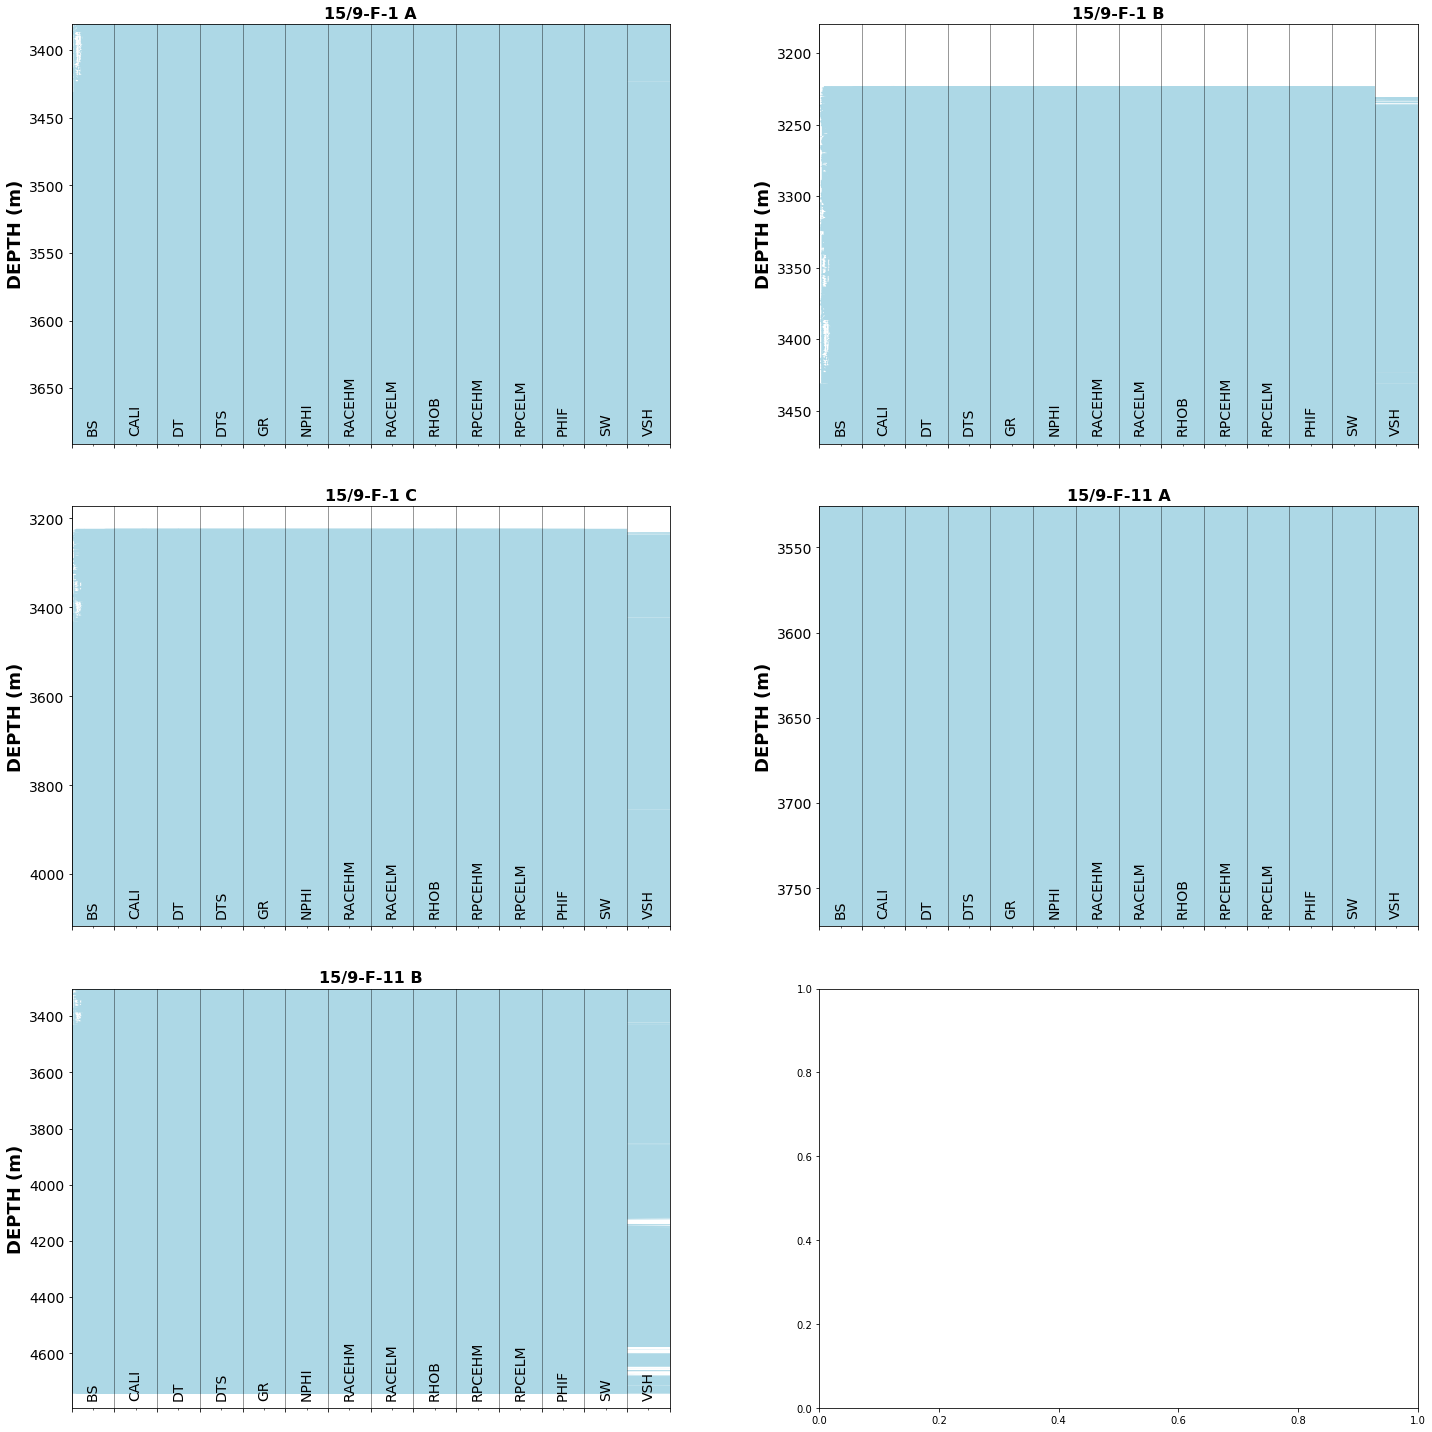

In [11]:
#Setup the labels we want to display on the x-axis
labels = ['BS', 'CALI', 'DT', 'DTS', 'GR', 'NPHI', 'RACEHM', 'RACELM', 'RHOB', 'RPCEHM', 'RPCELM', 'PHIF', 'SW', 'VSH']
#Setup the figure and the subplots
fig, axs = plt.subplots(3, 2, figsize=(20,20))
#Loop through each well and column in the grouped dataframe
for (name, well), ax in zip(grouped, axs.flat):
    ax.set_xlim(0,9)
    
    #Setup the depth range
    ax.set_ylim(well.MD.max() + 50, well.MD.min() - 50)
    
    # Create multiple fill betweens for each curve# This is between
    # the number representing null values and the number representing
    # actual values
    ticks = []
    ticks_labels = []
    for i, curve in enumerate(labels):
        ax.fill_betweenx(df.MD, i, df[curve], facecolor='lightblue')
        ticks.append(i)
        ticks_labels.append(i+0.5)
    
    # add extra value on to ticks
    ticks.append(len(ticks))
    
    #Setup the grid, axis labels and ticks
    ax.grid(axis='x', alpha=0.5, color='black')
    ax.set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
    
    #Position vertical lines at the boundaries between the bars
    ax.set_xticks(ticks, minor=False)
    
    #Position the curve names in the centre of each column
    ax.set_xticks(ticks_labels, minor=True)
    
    #Setup the x-axis tick labels
    ax.set_xticklabels(labels,  rotation='vertical', minor=True, verticalalignment='bottom', fontsize=14)
    ax.set_xticklabels('', minor=False)
    ax.tick_params(axis='x', which='minor', pad=-10)
    ax.tick_params(axis='y', labelsize=14 )
    
    #Assign the well name as the title to each subplot
    ax.set_title(name, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, wspace=0.25)
# plt.savefig('missingdata.png', dpi=200)
plt.show()

From the plot, we can not only see the data range of each well, but we can also see that 2 of the 5 wells have missing DT and DTS curves, 2 of the wells have missing data within RPCELM, and 2 of the wells have missing values in the PHIF and SW curves.

## Dealing With Missing Data
### Discarding Variables

As DT and DTS are missing in two of the wells, we have the option to remove these wells from the dataset, or we can remove these two columns for all of the wells.

The following is an example of how we remove the two curves from the dataframe. For this we can pass in a list of the columns names to the `drop()` function, the axis, which we want to drop data along, in this case the columns (axis=1), and the `inplace=True` argument allows us to physically remove these values from the dataframe.

In [12]:
df.drop(df[['DT', 'DTS']], axis=1, inplace=True)

If we view the header of the dataframe, we will see that we have removed the required columns.

In [13]:
df.head()

,wellName,MD,BS,CALI,GR,NPHI,RACEHM,RACELM,RHOB,RPCEHM,RPCELM,PHIF,SW,VSH
0,15/9-F-1 A,3431.0,8.5,8.6718,53.9384,0.3222,0.5084,0.8457,2.7514,0.6461,0.6467,0.02,1.0,0.6807
1,15/9-F-1 A,3431.1,8.5,8.6250,57.2889,0.3239,0.4695,0.8145,2.7978,0.7543,0.6570,0.02,1.0,0.7316
2,15/9-F-1 A,3431.2,8.5,8.6250,59.0455,0.3277,0.5012,0.8048,2.8352,0.8718,0.6858,0.02,1.0,0.7583
3,15/9-F-1 A,3431.3,8.5,8.6250,58.2550,0.3357,0.6048,0.7984,2.8557,0.9451,0.7913,0.02,1.0,0.7462
4,15/9-F-1 A,3431.4,8.5,8.6250,59.4569,0.3456,0.7115,0.7782,2.8632,1.0384,0.8730,0.02,1.0,0.7646


However, if we call upon the info method, we can see we still have null values within the dataframe.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27845 entries, 0 to 27844
Data columns (total 14 columns):
wellName    27845 non-null object
MD          27845 non-null float64
BS          27845 non-null float64
CALI        27845 non-null float64
GR          27845 non-null float64
NPHI        27845 non-null float64
RACEHM      27845 non-null float64
RACELM      27845 non-null float64
RHOB        27845 non-null float64
RPCEHM      27845 non-null float64
RPCELM      27600 non-null float64
PHIF        27736 non-null float64
SW          27736 non-null float64
VSH         27844 non-null float64
dtypes: float64(13), object(1)
memory usage: 3.0+ MB


### Discarding NaNs

We can drop missing values by calling upon a special function called `dropna()`. This will remove any NaN (Not a Number) values from the dataframe. The `inplace=True` argument allows us to physically remove these values from the dataframe.

In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27491 entries, 0 to 27844
Data columns (total 14 columns):
wellName    27491 non-null object
MD          27491 non-null float64
BS          27491 non-null float64
CALI        27491 non-null float64
GR          27491 non-null float64
NPHI        27491 non-null float64
RACEHM      27491 non-null float64
RACELM      27491 non-null float64
RHOB        27491 non-null float64
RPCEHM      27491 non-null float64
RPCELM      27491 non-null float64
PHIF        27491 non-null float64
SW          27491 non-null float64
VSH         27491 non-null float64
dtypes: float64(13), object(1)
memory usage: 3.1+ MB


# Summary

This short notebook has shown three separate ways to visualise missing data. The first is by interrogating the dataframe, the second, by using the missingno library and thirdly by creating a custom visualisation with matplotlib.

At the end, we covered two ways in which missing data can be removed from the dataframe. The first by discarding variables, and the second by discarding missing values within the rows.
